In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Employee.csv')

In [ ]:
label_encoders = {}
categorical_cols = ['Education', 'City', 'Gender', 'EverBenched']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [5]:
X = df.drop('LeaveOrNot', axis=1)
y = df['LeaveOrNot']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [8]:
scaler = StandardScaler()
numeric_cols = ['Age', 'ExperienceInCurrentDomain', 'JoiningYear', 'PaymentTier']
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

print("VERİ ÖN İŞLEME TAMAMLANDI")
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")
print(f"\nKategorik değişken kodlamaları:")
for col in categorical_cols:
    print(f"{col}: {dict(zip(label_encoders[col].classes_, label_encoders[col].transform(label_encoders[col].classes_)))}")

VERİ ÖN İŞLEME TAMAMLANDI
Eğitim seti boyutu: (3722, 8)
Test seti boyutu: (931, 8)

Kategorik değişken kodlamaları:
Education: {'Bachelors': np.int64(0), 'Masters': np.int64(1), 'PHD': np.int64(2)}
City: {'Bangalore': np.int64(0), 'New Delhi': np.int64(1), 'Pune': np.int64(2)}
Gender: {'Female': np.int64(0), 'Male': np.int64(1)}
EverBenched: {'No': np.int64(0), 'Yes': np.int64(1)}


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
models = {
    'Lojistik Regresyon': LogisticRegression(random_state=42, max_iter=1000),
    'Karar Ağacı': DecisionTreeClassifier(random_state=42, max_depth=5),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100)
}

In [11]:
results = {}


Lojistik Regresyon Model Sonuçları
Doğruluk (Accuracy): 0.706

Sınıflandırma Raporu:
              precision    recall  f1-score   support

   Kalan (0)       0.73      0.88      0.80       611
 Ayrılan (1)       0.62      0.38      0.47       320

    accuracy                           0.71       931
   macro avg       0.67      0.63      0.63       931
weighted avg       0.69      0.71      0.68       931



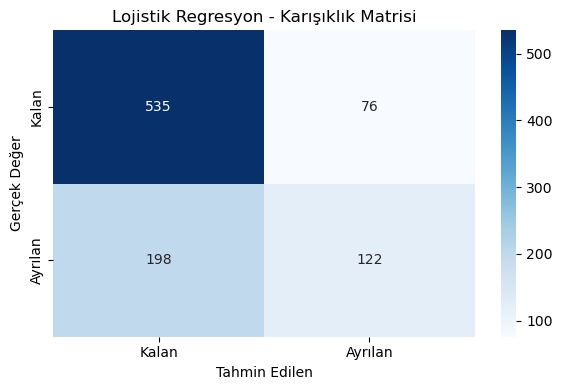


Karar Ağacı Model Sonuçları
Doğruluk (Accuracy): 0.829

Sınıflandırma Raporu:
              precision    recall  f1-score   support

   Kalan (0)       0.83      0.93      0.88       611
 Ayrılan (1)       0.83      0.63      0.72       320

    accuracy                           0.83       931
   macro avg       0.83      0.78      0.80       931
weighted avg       0.83      0.83      0.82       931



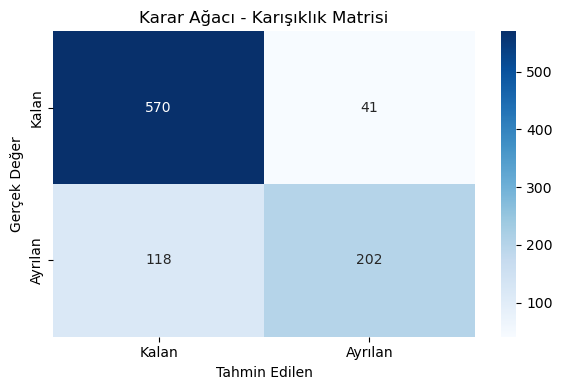


Random Forest Model Sonuçları
Doğruluk (Accuracy): 0.830

Sınıflandırma Raporu:
              precision    recall  f1-score   support

   Kalan (0)       0.84      0.92      0.88       611
 Ayrılan (1)       0.82      0.65      0.73       320

    accuracy                           0.83       931
   macro avg       0.83      0.79      0.80       931
weighted avg       0.83      0.83      0.83       931



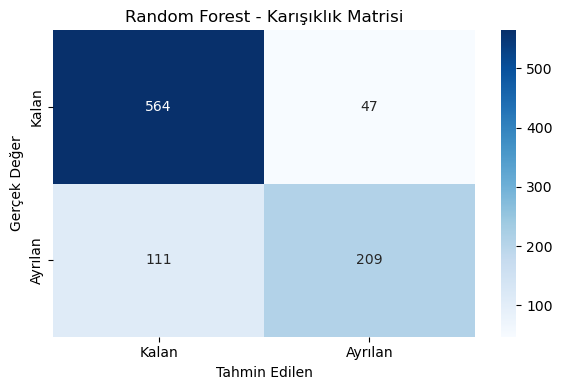

In [13]:
for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    
    print(f"\n{'='*50}")
    print(f"{name} Model Sonuçları")
    print(f"{'='*50}")
    print(f"Doğruluk (Accuracy): {accuracy:.3f}")
    print("\nSınıflandırma Raporu:")
    print(classification_report(y_test, y_pred, target_names=['Kalan (0)', 'Ayrılan (1)']))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Kalan', 'Ayrılan'],
                yticklabels=['Kalan', 'Ayrılan'])
    plt.title(f'{name} - Karışıklık Matrisi')
    plt.ylabel('Gerçek Değer')
    plt.xlabel('Tahmin Edilen')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_{name.replace(" ", "_")}.png', dpi=300)
    plt.show()

In [14]:
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n EN İYİ MODEL: {best_model_name}")
print(f" EN İYİ DOĞRULUK: {results[best_model_name]['accuracy']:.3f}")


 EN İYİ MODEL: Random Forest
 EN İYİ DOĞRULUK: 0.830



 ÖZELLİK ÖNEM DERECELERİ (Random Forest)
                     Özellik  Önem Derecesi
1                JoiningYear       0.342957
4                        Age       0.172082
2                       City       0.103190
3                PaymentTier       0.101620
0                  Education       0.094790
5                     Gender       0.083704
7  ExperienceInCurrentDomain       0.082465
6                EverBenched       0.019192


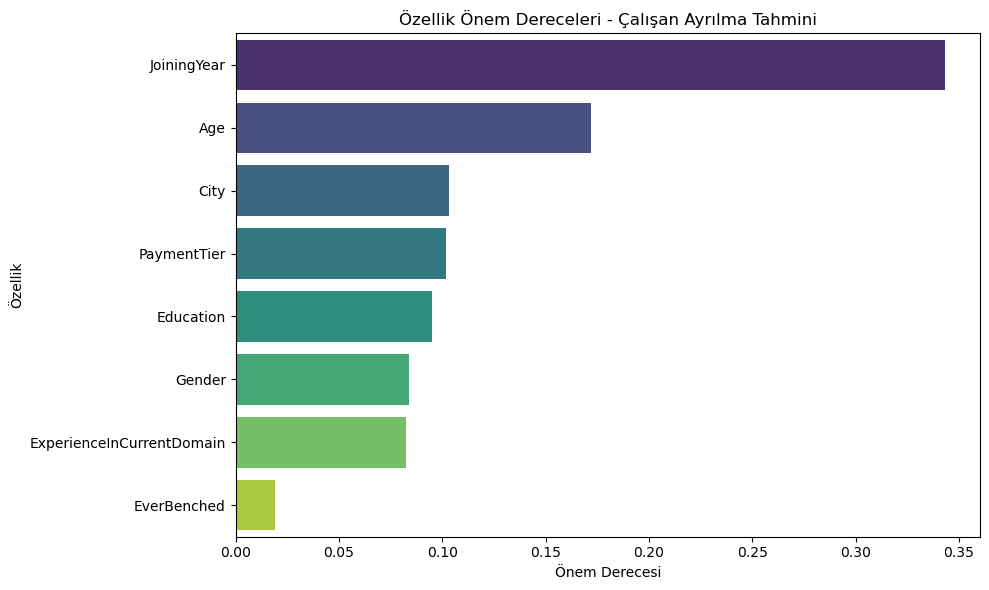

In [ ]:
if hasattr(best_model, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Özellik': X.columns,
        'Önem Derecesi': best_model.feature_importances_
    }).sort_values('Önem Derecesi', ascending=False)
    
    print("\n ÖZELLİK ÖNEM DERECELERİ (Random Forest)")
    print(feature_importance)
    
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Önem Derecesi', y='Özellik', data=feature_importance, palette='viridis')
    plt.title('Özellik Önem Dereceleri - Çalışan Ayrılma Tahmini')
    plt.xlabel('Önem Derecesi')
    plt.tight_layout()
    plt.savefig('feature_importance.png', dpi=300)
    plt.show()
else:
    
    if hasattr(best_model, 'coef_'):
        coefficients = pd.DataFrame({
            'Özellik': X.columns,
            'Katsayı': best_model.coef_[0]
        }).sort_values('Katsayı', ascending=False)
        
        print("\n LOJİSTİK REGRESYON KATSAYILARI")
        print(coefficients)

In [18]:
import joblib

joblib.dump(best_model, 'best_employee_churn_model.pkl')
joblib.dump(label_encoders, 'label_encoders.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\n MODEL KAYDEDİLDİ:")
print("- best_employee_churn_model.pkl")
print("- label_encoders.pkl")
print("- scaler.pkl")


print("\n YENİ TAHMİN ÖRNEĞİ:")
sample_employee = pd.DataFrame([{
    'Education': 'Bachelors',  
    'JoiningYear': 2019,
    'City': 'Bangalore',      
    'PaymentTier': 2,
    'Age': 28,
    'Gender': 'Male',         
    'EverBenched': 'No',      
    'ExperienceInCurrentDomain': 3
}])


for col in categorical_cols:
    le = label_encoders[col]
    
    sample_employee[col] = sample_employee[col].apply(lambda x: le.transform([x])[0] if x in le.classes_ else -1)


sample_employee[numeric_cols] = scaler.transform(sample_employee[numeric_cols])


prediction = best_model.predict(sample_employee)
prediction_proba = best_model.predict_proba(sample_employee)

print(f"Tahmin: {'Ayrılacak (1)' if prediction[0] == 1 else 'Kalacak (0)'}")
print(f"Olasılıklar: Ayrılma: {prediction_proba[0][1]:.2%}, Kalma: {prediction_proba[0][0]:.2%}")


 MODEL KAYDEDİLDİ:
- best_employee_churn_model.pkl
- label_encoders.pkl
- scaler.pkl

 YENİ TAHMİN ÖRNEĞİ:
Tahmin: Ayrılacak (1)
Olasılıklar: Ayrılma: 96.25%, Kalma: 3.75%
